In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df=pd.read_csv("LoansTrainingSet.csv", encoding="iso-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [6]:
df.duplicated().sum()

16610

In [7]:
df.duplicated(subset=["Loan ID"]).sum()

41284

In [8]:
df.duplicated(subset=["Customer ID"]).sum()

41284

In [9]:
df.loc[df.duplicated(), :]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
14,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
19,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6 years,Home Mortgage,35315.0,Debt Consolidation,$662.16,15.0,NaN,12,0,17092,20743,0.0,0.0
32,0006572c-9567-484d-b49b-bfe06536aa96,c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954,Charged Off,14727,Short Term,740.0,3 years,Home Mortgage,70690.0,Debt Consolidation,"$1,083.91",18.0,27.0,12,0,43375,225911,0.0,0.0
37,000795b0-d767-42bf-837a-80d5b78c1e50,b533c78c-3096-4914-acb1-5453c0ff76a4,Charged Off,19731,Long Term,623.0,3 years,Rent,43846.0,Buy House,$738.08,16.2,55.0,13,1,9031,17955,1.0,0.0
40,0008a65c-3054-4b5d-931d-8352021f813d,04513d99-d809-4eb6-b4bb-6abc767d861e,Charged Off,7066,Short Term,741.0,10+ years,Own Home,60564.0,Debt Consolidation,$706.58,14.6,56.0,4,0,6229,9242,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256892,ffe9a992-ed0a-4a80-bb8e-91e8fd778bec,53fbf0c5-0852-47a8-9860-6418fe21dd56,Charged Off,10784,Short Term,721.0,< 1 year,Rent,24581.0,Debt Consolidation,$559.21,14.8,NaN,9,0,18710,20674,0.0,0.0
256917,ffef32fb-8f16-496f-88fa-08929936267d,507f6a07-19f9-4e73-9064-046c445c45b4,Charged Off,18331,Short Term,733.0,3 years,Own Home,101840.0,Debt Consolidation,"$3,190.98",18.3,NaN,19,0,14696,20874,0.0,0.0
256969,fffc4837-d6f7-48c7-bc61-78422af92eb6,01511702-6e9f-490e-9fef-0a9dbf1c0e20,Charged Off,10782,Short Term,738.0,5 years,Rent,36787.0,Debt Consolidation,$732.67,9.5,NaN,8,0,13415,16440,0.0,0.0
256972,fffd5218-faf0-4b82-becf-11664fa064a3,301954fb-2381-4d68-a3b0-478870cd49f3,Charged Off,5968,Short Term,746.0,8 years,Own Home,79568.0,Debt Consolidation,"$1,412.33",22.1,63.0,10,1,4237,0,0.0,0.0


In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df["Years in current job"].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [12]:
df["Years in current job"] = df["Years in current job"].str.extract("(\d+)")

In [13]:
df["Years in current job"].unique()

array(['10', '4', '6', '5', nan, '3', '2', '1', '7', '9', '8'],
      dtype=object)

In [14]:
df["Years in current job"].fillna(0, inplace=True)

In [15]:
df["Years in current job"] = df["Years in current job"].astype(int)

In [16]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [17]:
df["Monthly Debt"] = df.loc[:, "Monthly Debt"].str.replace(',', '')

In [18]:
df["Monthly Debt"] = df.loc[:, "Monthly Debt"].str.replace('$', '').astype(float)

In [19]:
df["Maximum Open Credit"].unique()

array([16056, 19149, 28335, ..., 55520, 37004, 62371], dtype=object)

In [20]:
df['Maximum Open Credit'].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]',"0",inplace=True,regex=True)
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(float)

In [21]:
df.loc[df["Maximum Open Credit"] == 0, "Maximum Open Credit"] = 36250

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


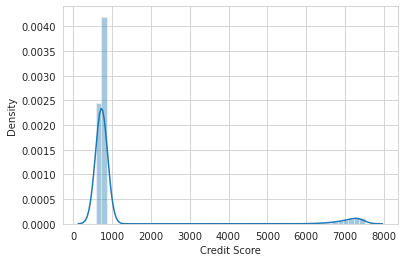

In [22]:
sns.distplot(df["Credit Score"])

In [23]:
df.loc[df["Credit Score"] > 850].sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
235029,e9d25acc-9cde-4c73-9209-edef77bf98fb,0d559d83-c7b6-4a42-8d71-fd401ea649c2,Charged Off,15458,Long Term,7210.0,10,Home Mortgage,74318.0,Debt Consolidation,1405.84,16.1,NaN,15,0,35290,41912.0,0.0,0.0
87748,5733cbd0-64d8-47b0-98ca-0e8e16b7208f,61efd878-18c9-4e96-a333-f946763148b5,Charged Off,15047,Short Term,7360.0,6,Own Home,50155.0,Debt Consolidation,468.12,16.3,9.0,8,1,4576,8230.0,1.0,0.0
41812,29990b6f-80dc-4802-872d-bd878736c5a5,ce86a0f7-f6ef-433b-9a2f-3c2ce3c672d2,Charged Off,7996,Short Term,7250.0,2,Rent,33983.0,Debt Consolidation,838.25,5.6,NaN,11,0,8367,14994.0,0.0,0.0
14280,0e3d0ecb-c5e9-48de-a947-152e15351d3d,58eb517d-8188-40e2-a865-3659786b39a6,Charged Off,34825,Short Term,7400.0,3,Rent,81590.0,Business Loan,220.97,13.9,NaN,17,0,718,37810.0,0.0,0.0
114343,719200cc-a065-44e6-9c5b-a07ef3cbb964,b380c06b-5786-4511-af5a-d0d208eb33cd,Charged Off,6997,Short Term,7250.0,10,Rent,109956.0,Home Improvements,1337.79,13.5,NaN,7,0,11828,13899.0,0.0,0.0
212851,d3c7327e-7a0f-4ecd-9449-fff2c177bbb7,8c43bdc3-b669-4d74-8092-1276ec4fc0e9,Charged Off,5414,Short Term,7100.0,5,Rent,19686.0,Debt Consolidation,301.86,8.4,NaN,5,0,6894,7678.0,0.0,0.0
177950,b0e65899-369c-4bb4-8807-9240a87648ec,38edc6e9-dd75-4638-888c-46136fec8d3b,Charged Off,35669,Long Term,7180.0,2,Home Mortgage,112101.0,Debt Consolidation,1700.20,28.5,16.0,9,0,78652,97463.0,0.0,0.0
119856,772787cc-0b63-473f-90f7-b6bed763ab70,3088342e-42e1-4fde-9c2a-e78fa976b505,Charged Off,3071,Short Term,7090.0,1,Rent,32758.0,Other,338.51,5.5,NaN,13,0,8161,15369.0,0.0,0.0
75353,4acf70cc-fd01-4594-b253-2ae273b254a7,4395a066-9be1-4c73-b5ca-33e526afe7b8,Charged Off,3908,Short Term,6820.0,10,Rent,48845.0,other,155.49,13.3,NaN,7,0,3736,13683.0,0.0,0.0
161543,a0b53ac0-a351-48c5-95b9-b8e0436f0d1f,97c6d3f4-c0da-4c38-b744-8f7214da1b84,Charged Off,5854,Short Term,7370.0,10,Home Mortgage,107327.0,Buy House,2325.42,23.9,NaN,18,0,58495,63929.0,0.0,0.0


In [24]:
df.loc[df["Credit Score"] > 850, "Credit Score"] = df["Credit Score"] / 10

In [25]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4,Home Mortgage,42269.0,other,1106.04,26.3,NaN,17,0,6262,19149.0,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0


In [26]:
df["Credit Score"].max()

751.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


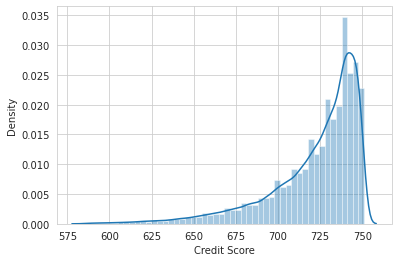

In [27]:
sns.distplot(df["Credit Score"])

In [28]:
df[df.isnull().any(axis=1)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4,Home Mortgage,42269.0,other,1106.04,26.3,NaN,17,0,6262,19149.0,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716.0,10,Rent,41853.0,Business Loan,561.52,13.2,NaN,4,1,2289,4671.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256973,fffe36ec-97a6-460a-a236-640b7e0669f0,6520de3e-5961-47b1-bced-6a8132acb5cc,Charged Off,10575,Long Term,NaN,1,Rent,NaN,Debt Consolidation,707.08,14.8,NaN,18,0,20183,23496.0,0.0,0.0
256974,fffe36ec-97a6-460a-a236-640b7e0669f0,6520de3e-5961-47b1-bced-6a8132acb5cc,Charged Off,10575,Long Term,722.0,1,Rent,30854.0,Debt Consolidation,707.08,14.8,NaN,18,0,20183,23496.0,0.0,0.0
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,717.0,10,Home Mortgage,39844.0,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783.0,1.0,0.0
256978,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,717.0,10,Home Mortgage,39844.0,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783.0,1.0,0.0


In [29]:
df[df['Annual Income'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,24613,Long Term,NaN,6,Rent,NaN,Business Loan,542.29,17.6,73.0,7,0,14123,16954.0,0.0,0.0
8,00011dfc-31c1-4178-932a-fbeb3f341efb,ef6e098c-6c83-4752-8d00-ff793e476b8c,Fully Paid,10036,Short Term,NaN,5,Rent,NaN,Debt Consolidation,386.36,17.7,NaN,7,0,11970,16579.0,0.0,0.0
12,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17980,Short Term,NaN,1,Own Home,NaN,Debt Consolidation,597.50,9.9,43.0,7,0,6817,22800.0,0.0,0.0
20,00038a08-f058-4add-a8ed-497b91672a9e,727bb429-dfa1-41c4-a347-23230e23949f,Charged Off,16929,Long Term,NaN,3,Home Mortgage,NaN,Debt Consolidation,745.70,14.9,NaN,10,0,28513,101110.0,0.0,0.0
22,0003b749-307f-4830-9fb4-9db7ed1b1c48,998dc43c-f9ce-466e-bdaa-7057b0bbb9cd,Fully Paid,7228,Short Term,NaN,3,Home Mortgage,NaN,Debt Consolidation,439.56,17.8,NaN,13,1,8488,15866.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256959,fff9b38f-9a27-49d0-8d49-6306f41529eb,f8579c88-cbda-48ce-a542-42fbefccd01d,Fully Paid,9753,Short Term,NaN,2,Own Home,NaN,Debt Consolidation,469.35,23.2,80.0,7,1,5022,9248.0,1.0,0.0
256962,fffaa912-faa8-4bdf-8ff1-fd5884e51c66,d059bcea-3016-48d3-b7e0-c6e618e1f2c3,Fully Paid,6655,Short Term,NaN,10,Rent,NaN,Debt Consolidation,620.42,11.1,62.0,15,0,7114,18336.0,0.0,0.0
256965,fffc297d-74f0-4d42-ad90-cdea2bd9aac0,b8cae6f0-6c9b-4982-bef2-e3cdf48add59,Charged Off,11524,Short Term,NaN,6,Home Mortgage,NaN,Debt Consolidation,790.35,21.4,NaN,23,0,12818,19160.0,0.0,0.0
256973,fffe36ec-97a6-460a-a236-640b7e0669f0,6520de3e-5961-47b1-bced-6a8132acb5cc,Charged Off,10575,Long Term,NaN,1,Rent,NaN,Debt Consolidation,707.08,14.8,NaN,18,0,20183,23496.0,0.0,0.0


In [30]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     59346
Years in current job                 0
Home Ownership                       0
Annual Income                    59346
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    131427
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       492
Tax Liens                           23
dtype: int64

In [31]:
df["Credit Score"].fillna(0, inplace=True)

In [32]:
df["Annual Income"].fillna(0, inplace=True)

In [33]:
df[df['Months since last delinquent'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4,Home Mortgage,42269.0,other,1106.04,26.3,NaN,17,0,6262,19149.0,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0
5,0000a149-b055-4a57-b762-280783ccc25e,62ddc017-7023-4ba7-af23-1a7cd16c1ce5,Fully Paid,10208,Short Term,716.0,10,Rent,41853.0,Business Loan,561.52,13.2,NaN,4,1,2289,4671.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256973,fffe36ec-97a6-460a-a236-640b7e0669f0,6520de3e-5961-47b1-bced-6a8132acb5cc,Charged Off,10575,Long Term,0.0,1,Rent,0.0,Debt Consolidation,707.08,14.8,NaN,18,0,20183,23496.0,0.0,0.0
256974,fffe36ec-97a6-460a-a236-640b7e0669f0,6520de3e-5961-47b1-bced-6a8132acb5cc,Charged Off,10575,Long Term,722.0,1,Rent,30854.0,Debt Consolidation,707.08,14.8,NaN,18,0,20183,23496.0,0.0,0.0
256977,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,717.0,10,Home Mortgage,39844.0,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783.0,1.0,0.0
256978,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,11953,Short Term,717.0,10,Home Mortgage,39844.0,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783.0,1.0,0.0


In [34]:
df["Months since last delinquent"].fillna(0, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240374 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       240374 non-null  object 
 1   Customer ID                   240374 non-null  object 
 2   Loan Status                   240374 non-null  object 
 3   Current Loan Amount           240374 non-null  int64  
 4   Term                          240374 non-null  object 
 5   Credit Score                  240374 non-null  float64
 6   Years in current job          240374 non-null  int64  
 7   Home Ownership                240374 non-null  object 
 8   Annual Income                 240374 non-null  float64
 9   Purpose                       240374 non-null  object 
 10  Monthly Debt                  240374 non-null  float64
 11  Years of Credit History       240374 non-null  float64
 12  Months since last delinquent  240374 non-nul

In [36]:
df[df['Bankruptcies'].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
119,001eb42c-2b5b-4640-bf9d-8c086a1076f4,9377bba7-2cab-4478-91c2-a3ff2904638d,Fully Paid,12128,Short Term,747.0,7,Home Mortgage,90963.0,Debt Consolidation,123.56,24.1,0.0,6,0,4406,28795.0,NaN,0.0
183,002dc37f-f6b5-4113-8d5c-53c25ac6111e,647fd091-0705-4a01-9da6-e57c427562f0,Fully Paid,5006,Short Term,749.0,1,Own Home,45054.0,Debt Consolidation,42.05,25.0,0.0,5,0,1785,36250.0,NaN,NaN
198,0032e3fa-57eb-481c-8622-93474261fa58,96328109-568d-42fc-88e5-8fc876de4922,Fully Paid,99999999,Short Term,697.0,2,Home Mortgage,50220.0,Debt Consolidation,853.74,29.6,15.0,13,0,12628,17588.0,NaN,0.0
217,00383da1-20b2-4d18-bfbb-2621b01eee08,dd532c7c-d95b-4bb0-bfef-b103143120f8,Fully Paid,9451,Short Term,736.0,1,Rent,57698.0,Debt Consolidation,1053.00,21.2,31.0,20,0,26082,90877.0,NaN,0.0
225,003a3241-adbe-4337-b73a-5085c6834a74,08117601-9319-41e3-9fa6-6da917c70fa5,Charged Off,7253,Short Term,744.0,1,Rent,45329.0,Debt Consolidation,30.22,15.9,0.0,4,0,3356,10968.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252504,fb8c9ee6-08e5-4dbf-83a9-8627c4633995,be038676-1076-41cf-bddf-3691fbde65b2,Fully Paid,17178,Short Term,743.0,1,Rent,149328.0,Medical Bills,14.93,11.8,0.0,6,0,1007,20145.0,NaN,0.0
252557,fb983479-33ce-4c72-a218-9f25e0c80fb1,f835f62f-7819-4654-95dc-08d709d75e75,Fully Paid,18081,Short Term,727.0,3,Rent,75548.0,Debt Consolidation,648.45,16.0,0.0,5,0,23562,25977.0,NaN,0.0
255426,fe6b5179-2c9f-4ec6-a084-2f9a709e0d1d,9bb5a755-275b-463b-8855-9d92dec1995b,Fully Paid,19662,Short Term,704.0,1,Home Mortgage,78648.0,Debt Consolidation,1356.68,19.6,49.0,8,0,16521,25774.0,NaN,0.0
255866,fee13885-f413-428a-bc44-4f10f740058a,dc329ffc-abeb-49ec-bf22-fddd601ee2c5,Fully Paid,4094,Short Term,733.0,10,Home Mortgage,51170.0,Home Improvements,660.94,31.4,6.0,9,0,11236,30204.0,NaN,0.0


In [37]:
df["Bankruptcies"].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  7.,  6.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


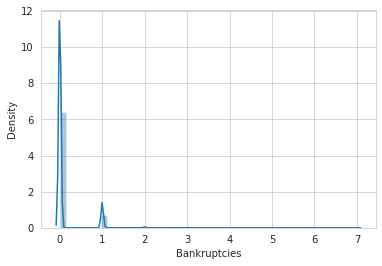

In [38]:
sns.distplot(df["Bankruptcies"])

In [39]:
df["Bankruptcies"].fillna(0, inplace=True)

In [40]:
df[df["Tax Liens"].isnull()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
183,002dc37f-f6b5-4113-8d5c-53c25ac6111e,647fd091-0705-4a01-9da6-e57c427562f0,Fully Paid,5006,Short Term,749.0,1,Own Home,45054.0,Debt Consolidation,42.05,25.0,0.0,5,0,1785,36250.0,0.0,NaN
2937,0302ccc1-e514-459e-88b0-88db890299d9,0fb77c3a-0dea-4814-86de-5684989d8c03,Fully Paid,7633,Short Term,746.0,1,Home Mortgage,152655.0,Home Improvements,346.02,23.2,0.0,15,0,24097,98759.0,0.0,NaN
25243,193d7f29-89f9-4c59-9e44-c1ca8ea36209,3b462912-a081-4407-a1b1-3553a29bb974,Fully Paid,5017,Short Term,0.0,10,Home Mortgage,0.0,other,15.22,21.6,0.0,12,0,1581,27740.0,0.0,NaN
28374,1c622daa-f250-4c9d-9886-70584f2f386c,df6364b3-d29e-4eb7-9999-2bab32665de1,Fully Paid,5695,Short Term,0.0,10,Home Mortgage,0.0,Debt Consolidation,27.86,29.5,0.0,10,0,2790,27356.0,0.0,NaN
44936,2cb16c8a-eb82-455e-981b-6a1ccaa23ad4,c40c5e81-65a7-4be3-8a52-cb3cc4b2aafa,Fully Paid,4896,Short Term,0.0,8,Home Mortgage,0.0,Debt Consolidation,224.21,18.8,0.0,8,0,8204,48544.0,0.0,NaN
58412,3a17105b-d1f5-460c-a582-829153486728,e743f01f-d0da-40a3-a8be-4586988ffe07,Fully Paid,3579,Short Term,735.0,1,Rent,13804.0,Educational Expenses,188.65,13.6,0.0,10,0,2928,7125.0,0.0,NaN
59531,3b360828-46f8-47f2-b0e6-a35e264afd4c,db5a2b13-1042-4b5d-a253-e63e048b530b,Fully Paid,8628,Short Term,732.0,3,Rent,18272.0,Debt Consolidation,97.45,29.6,5.0,6,0,8981,33385.0,0.0,NaN
79732,4f24d2ce-e40c-4292-8b19-b917883ff591,ef2336d5-f343-4204-8323-963d8d73e05a,Fully Paid,7604,Short Term,681.0,1,Own Home,22304.0,Debt Consolidation,265.79,12.8,11.0,7,0,4233,8219.0,0.0,NaN
83053,5281109c-6072-49a0-8905-4d4e893ca4fc,8353060c-c9db-49a4-adb9-dcb0d431545a,Fully Paid,5097,Short Term,736.0,4,Home Mortgage,48926.0,Debt Consolidation,327.40,21.0,0.0,6,0,28876,59415.0,0.0,NaN
90477,59e97342-89db-487c-8333-0fb09470cc3c,52ddf5cd-786e-4221-8357-d16de7f75475,Fully Paid,99999999,Short Term,746.0,4,Rent,31674.0,Take a Trip,390.64,21.1,0.0,11,0,4689,19618.0,0.0,NaN


In [41]:
df["Tax Liens"].unique()

array([ 0.,  5., nan,  1.,  2.,  4.,  3.,  6.,  7.,  9.,  8., 10., 11.])

In [42]:
df["Tax Liens"].fillna(0, inplace=True)

In [43]:
df.sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
157346,9c7ab34e-86a2-41c3-b59c-c9d6f53bcca0,1f9fc1e4-c803-4ba8-925e-199a167b1bd3,Charged Off,4942,Short Term,648.0,0,Rent,15471.0,other,349.38,13.7,0.0,13,0,5235,33341.0,0.0,0.0
39421,2733e23b-caf9-4344-bbba-28d679b3896b,4101ec69-d96e-4bde-a5c9-e89b21a99e5c,Fully Paid,15363,Short Term,0.0,10,Own Home,0.0,Debt Consolidation,1057.87,13.1,0.0,17,1,15325,23150.0,1.0,0.0
120100,77686115-3ccd-43ea-915b-445496897f1c,8638d388-e016-4366-a940-ba4ec81b95f3,Fully Paid,6018,Short Term,744.0,4,Rent,66198.0,Home Improvements,68.40,9.2,0.0,5,0,567,19541.0,0.0,0.0
178201,b1205848-827f-45df-bd78-05a6085ab512,7456c525-c7a2-4be1-b798-6f1a66ea6c60,Fully Paid,2418,Short Term,706.0,2,Own Home,20152.0,Debt Consolidation,248.54,9.5,39.0,19,0,4747,20460.0,0.0,0.0
60854,3c8b84f7-6d2f-4696-ac3a-d428f5a2fc88,088a8020-6aaa-4fc1-bfc3-879b582a88a6,Charged Off,16143,Short Term,743.0,7,Home Mortgage,60918.0,Debt Consolidation,1360.50,22.2,51.0,15,0,31996,69557.0,0.0,0.0
121122,785d0035-4192-4d18-8700-b3e9cf53990d,431be281-f649-41cb-91eb-907298f2b94a,Charged Off,10201,Short Term,0.0,7,Own Home,0.0,Business Loan,175.36,12.5,65.0,5,0,6100,6322.0,0.0,0.0
80826,5049fea7-89f9-46e1-9be4-208741da801b,5e442ae3-9805-48bc-b571-f045ba637b2a,Charged Off,5806,Short Term,627.0,10,Home Mortgage,32035.0,Debt Consolidation,587.32,11.0,26.0,6,0,6132,9207.0,0.0,0.0
109298,6c8feb18-d4bb-4a34-8fbe-9ee8aa483e71,799c906d-06eb-4e96-bdf3-6b6c088edd30,Charged Off,9544,Short Term,0.0,10,Own Home,0.0,Debt Consolidation,201.82,15.1,67.0,6,0,5704,12817.0,0.0,0.0
155257,9a60f9dd-c4b1-45f6-931e-61a9d782e60d,b6983304-ee62-47dc-8ea3-5d2271994eb5,Fully Paid,2026,Short Term,730.0,10,Home Mortgage,76185.0,Debt Consolidation,818.99,18.5,0.0,7,0,41735,48529.0,0.0,0.0
155097,9a3c2ed3-64cc-491b-9346-8114eba3380a,20d9ddee-4003-45fe-a8b8-edf64d1fc282,Fully Paid,3567,Short Term,730.0,2,Rent,32204.0,Debt Consolidation,582.36,6.6,0.0,4,0,3494,3666.0,0.0,0.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240374 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       240374 non-null  object 
 1   Customer ID                   240374 non-null  object 
 2   Loan Status                   240374 non-null  object 
 3   Current Loan Amount           240374 non-null  int64  
 4   Term                          240374 non-null  object 
 5   Credit Score                  240374 non-null  float64
 6   Years in current job          240374 non-null  int64  
 7   Home Ownership                240374 non-null  object 
 8   Annual Income                 240374 non-null  float64
 9   Purpose                       240374 non-null  object 
 10  Monthly Debt                  240374 non-null  float64
 11  Years of Credit History       240374 non-null  float64
 12  Months since last delinquent  240374 non-nul

In [45]:
df["Customer ID"].duplicated().sum()

24674

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


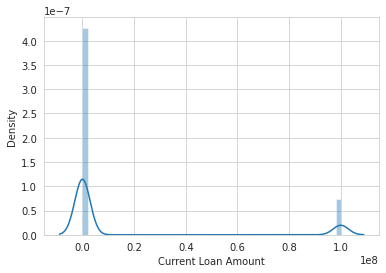

In [46]:
sns.distplot(df["Current Loan Amount"])

In [47]:
df.drop(df[df["Current Loan Amount"] > 500000].index, inplace = True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205164 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       205164 non-null  object 
 1   Customer ID                   205164 non-null  object 
 2   Loan Status                   205164 non-null  object 
 3   Current Loan Amount           205164 non-null  int64  
 4   Term                          205164 non-null  object 
 5   Credit Score                  205164 non-null  float64
 6   Years in current job          205164 non-null  int64  
 7   Home Ownership                205164 non-null  object 
 8   Annual Income                 205164 non-null  float64
 9   Purpose                       205164 non-null  object 
 10  Monthly Debt                  205164 non-null  float64
 11  Years of Credit History       205164 non-null  float64
 12  Months since last delinquent  205164 non-nul

In [49]:
df.duplicated().sum()

8888

In [50]:
df.drop_duplicates(inplace = True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196276 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       196276 non-null  object 
 1   Customer ID                   196276 non-null  object 
 2   Loan Status                   196276 non-null  object 
 3   Current Loan Amount           196276 non-null  int64  
 4   Term                          196276 non-null  object 
 5   Credit Score                  196276 non-null  float64
 6   Years in current job          196276 non-null  int64  
 7   Home Ownership                196276 non-null  object 
 8   Annual Income                 196276 non-null  float64
 9   Purpose                       196276 non-null  object 
 10  Monthly Debt                  196276 non-null  float64
 11  Years of Credit History       196276 non-null  float64
 12  Months since last delinquent  196276 non-nul

In [52]:
df['Home Ownership'].replace(['HaveMortgage','Home Mortgage'],'Mortgage',inplace=True)

In [53]:
df['Purpose'].replace('other','Other',inplace=True)

In [54]:
df=df.drop(['Loan ID','Customer ID'],axis=1)

In [55]:
df.sample(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
50186,Fully Paid,5580,Short Term,714.0,5,Rent,42106.0,Debt Consolidation,407.03,8.5,0.0,5,0,4268,4873.0,0.0,0.0
223948,Fully Paid,3012,Short Term,0.0,10,Rent,0.0,Other,814.50,17.2,37.0,12,0,102,6827.0,0.0,0.0
7731,Fully Paid,14004,Short Term,728.0,10,Mortgage,88026.0,Debt Consolidation,1437.76,20.1,0.0,14,0,26295,32423.0,0.0,0.0
248851,Charged Off,10180,Short Term,0.0,1,Rent,0.0,Debt Consolidation,309.34,16.8,61.0,9,0,7867,15487.0,0.0,0.0
139067,Fully Paid,5946,Short Term,720.0,7,Rent,33694.0,Debt Consolidation,325.71,16.4,8.0,12,0,8213,21786.0,0.0,0.0


In [56]:
x,y=df.drop('Loan Status',axis=1),df[['Loan Status']]

In [57]:
x=pd.get_dummies(x,drop_first=True)

In [58]:
y=pd.get_dummies(y,drop_first=True)

In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196276 entries, 0 to 256983
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           196276 non-null  int64  
 1   Credit Score                  196276 non-null  float64
 2   Years in current job          196276 non-null  int64  
 3   Annual Income                 196276 non-null  float64
 4   Monthly Debt                  196276 non-null  float64
 5   Years of Credit History       196276 non-null  float64
 6   Months since last delinquent  196276 non-null  float64
 7   Number of Open Accounts       196276 non-null  int64  
 8   Number of Credit Problems     196276 non-null  int64  
 9   Current Credit Balance        196276 non-null  int64  
 10  Maximum Open Credit           196276 non-null  float64
 11  Bankruptcies                  196276 non-null  float64
 12  Tax Liens                     196276 non-nul

In [60]:
y.shape,x.shape

((196276, 1), (196276, 24))

In [61]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,SVC,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [62]:
classification_funct(x,y)

(157020, 24) (39256, 24) (157020, 1) (39256, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/

,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.841609,0.946572,0.757601,0.743148
SVC,0.837823,1.000000,0.720909,0.720909
LogisticRegression,0.837703,0.999753,0.720859,0.720731
XGBClassifier,0.837479,0.963604,0.740550,0.730385
BernoulliNB,0.837177,0.995442,0.722333,0.720858
KNeighborsClassifier,0.790689,0.855760,0.734814,0.673375
DecisionTreeClassifier,0.744368,0.736148,0.752773,0.635495
GaussianNB,0.239892,0.140777,0.810580,0.356863
